# Préparation des données - PipeLine

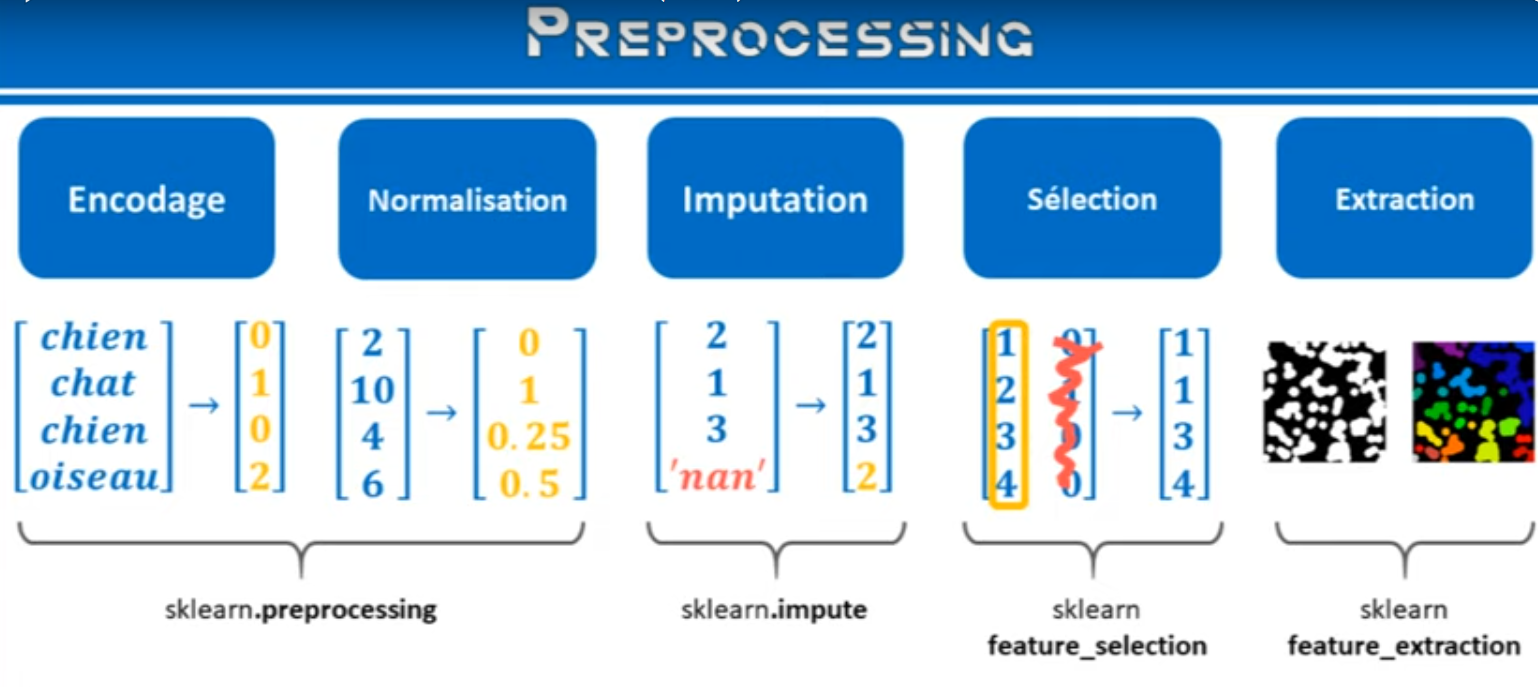



## Préprocessing Transformers

Types de preprocessing :
- 1.1- Encodage pour les variables qualitatives
- 1.2- Normalisation pour les variables quantitatives 
- 1.3- Discrétisation pour les variables quantitatives continues (ex : définition de tranches d'ages)
- 1.4- Faire suivre une distribution (polynomiale, gaussienne etc.)
- 1.5- Normaliser selon une fonction personnalisée

Se fait en 2 étape 
- transformer.fit(x) -> créer une transformation en analysant les données du train set
- transformer.transform(x) -> appliquer les transformations données du train et du test set


ou une seule 
- transformer.fit_transform(x) -> Combinaison des 2 


La suite Transformer + Estimator (modèle prédicfif) = PIPELINE

Exemple :


In [8]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

X = np.array(['chat', 
              'chien', 
              'chat', 
              'oiseau'])
print(X)
transformer = LabelEncoder()

#Méthode 1
transformer.fit(X)
print(transformer.transform(X))

#Méthode 2
print(transformer.fit_transform(X))


['chat' 'chien' 'chat' 'oiseau']
[0 1 0 2]
[0 1 0 2]


### 1.1 Preprocessing - Encodage/décodage de label vers nombres

#### L'encodage Ordinal : une valeur / label = une valeur décimale unique 
- LabelEncoder : une seule variable (une colonne dans le tab)
- OrdinalEncoder : plusieurs colonnes (chacune sa codification)

-> Attention, le fait d'attribuer des valeurs numériques au données risque de générer des biais dans les algos de ML (d'où l'utilisation de l'encodage One Hot)


#### L'encodage binaire : un valeur / label = une colonne binaire
- LabelBinarizer : une seule variable (une colonne dans le tab)
- MultiLabelBinarizer : une seule variable (une colonne dans le tab)
- OneHotEncoder : plusieurs colonnes (chacune sa codification)


-> Attention lorsqu'il y a de nombreuses valeurs différentes (= colonnes). On va utiliser un stockage qui ne garde pas en mémoire les 0 : Compressed Sparse Row (proche du Sparse Matrix = matrice creuse)

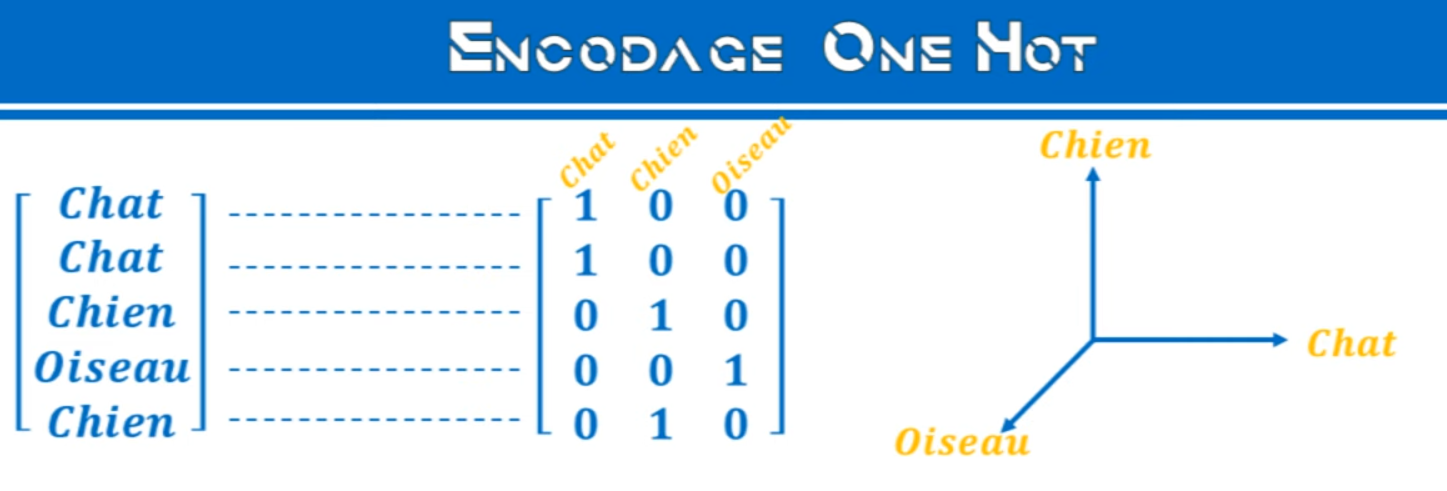


-> Attention les Encodeurs retournent une erreur si une nouvelle classe inconnue apparait (ex: poisson)

In [11]:
#LabelEncoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(encoder.fit_transform(X))

#obtenir les différentes valeurs possibles
print(encoder.classes_)

#obtenir l'inverse (nombre vers label)
encoder.inverse_transform(np.array([0,0,1,2]))



[0 1 0 2]
['chat' 'chien' 'oiseau']


array(['chat', 'chat', 'chien', 'oiseau'], dtype='<U6')

In [14]:
#OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

X = np.array([['chat','poils'],
              ['chien','poils'],
              ['chat','poils'],
              ['oiseau','plumes']])


encoder = OrdinalEncoder()
print(encoder.fit_transform(X))


[[0. 1.]
 [1. 1.]
 [0. 1.]
 [2. 0.]]


In [20]:
#LabelBinarizer

from sklearn.preprocessing import LabelBinarizer

y = np.array(['chat', 
              'chien', 
              'chat', 
              'oiseau'])

#Le resultat peut être une matrice binaire "pleine" (0 stockés en mémoire) 
#-> sparse_output=False (par défaut pour LabelBinarizer)

encoder = LabelBinarizer()
print(encoder.fit_transform(y))

#ou matrice binaire "creuse" (0 non stockés en mémoire) 
#-> sparse_output=True (format)

encoder = LabelBinarizer(sparse_output=True)
print(encoder.fit_transform(y))
encoder.fit_transform(y)


[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]]
  (0, 0)	1
  (1, 1)	1
  (2, 0)	1
  (3, 2)	1


<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [22]:
#MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

X = np.array([['chat','poils'],
              ['chien','poils'],
              ['chat','poils'],
              ['oiseau','plumes']])

#Pour MultiLabelBinarizer, par défaut, la matrice est pleine
encoder = MultiLabelBinarizer()
print(encoder.fit_transform(X))

[[1 0 0 0 1]
 [0 1 0 0 1]
 [1 0 0 0 1]
 [0 0 1 1 0]]


In [23]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

X = np.array([['chat','poils'],
              ['chien','poils'],
              ['chat','poils'],
              ['oiseau','plumes']])

#Pour OneHotEncoder, par défaut, la matrice est creuse
encoder = OneHotEncoder()
print(encoder.fit_transform(X))

  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 2)	1.0
  (3, 3)	1.0


### 1.2 Preprocessing - Normalisation

Pour les variables quantitatives, permet de mettre toutes les variables sur une même échelle
-> cela permet de minimiser l'effort lors de la descente de gradient

Les 3 plus connues sont 
- MinMaxScaler : mise à l'échelle avec 0 comme plus petite valeur présente dans les données du train et 1 comme max

-> Attention sensible aux valeurs aberrantes 

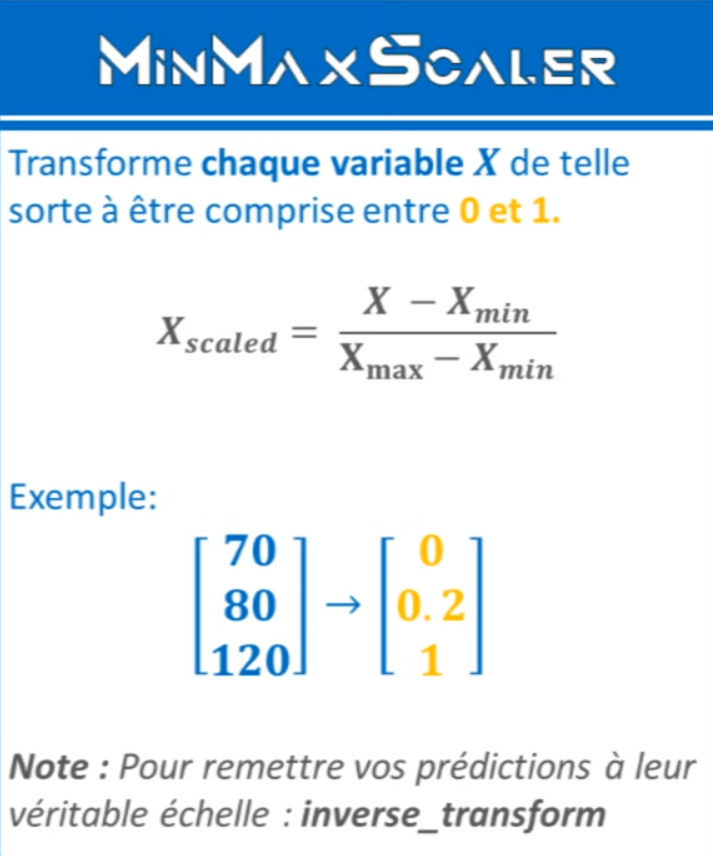


- StandardScaler :  mise à l'échelle par rapport à la moyenne des valeurs dans l'échantillon

-> Attention sensible aux valeurs aberrantes 


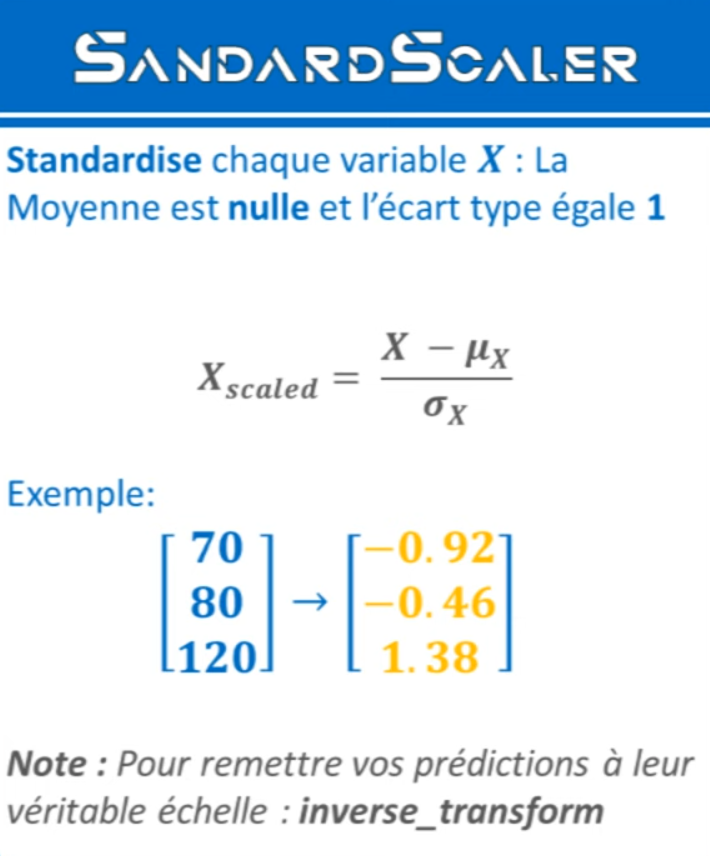


- RobustScaler 

-> Moins sensible aux valeurs aberrantes car se base sur la médianne (pas la moyenne ni min/max)

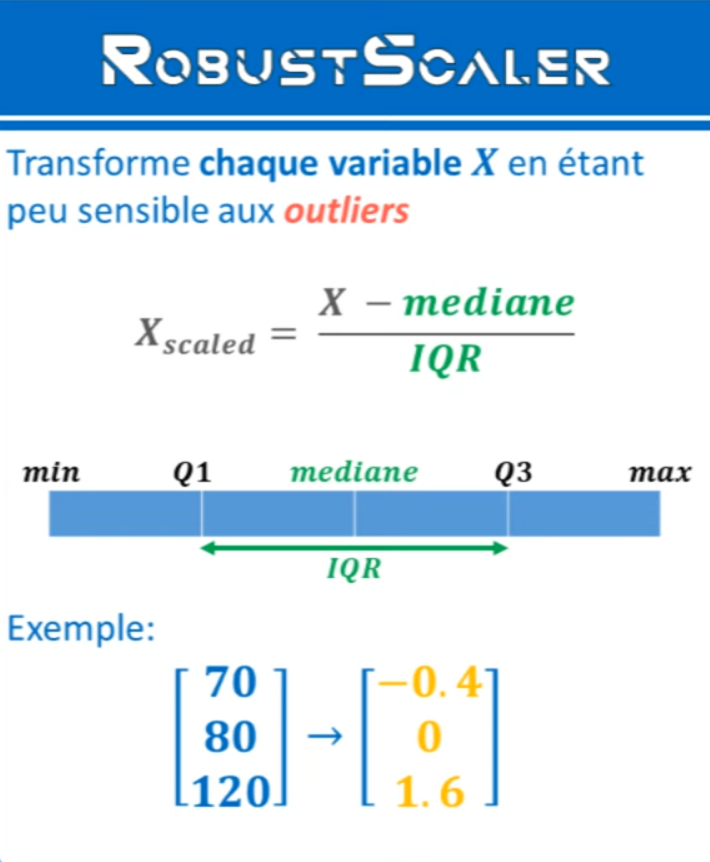

[[0. ]
 [0.2]
 [1. ]]


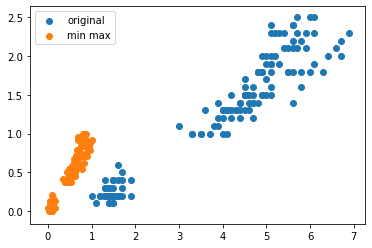

In [35]:
#MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

X = np.array([[70],
              [80],
              [120]])

scaler = MinMaxScaler()
print(scaler.fit_transform(X))

#On peut prendre n'importe quelle valeur dans le test set et la transformation sera appliquée (ex avec 90)
X_test = np.array([[90]])
scaler.transform(X_test)



#exemple avec les fleurs d'Iris

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X= iris.data
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3], label ='original')
plt.scatter(X_minmax[:,2],X_minmax[:,3], label ='min max')
plt.legend()
plt.show()
plt.clf()


[[-0.9258201 ]
 [-0.46291005]
 [ 1.38873015]]


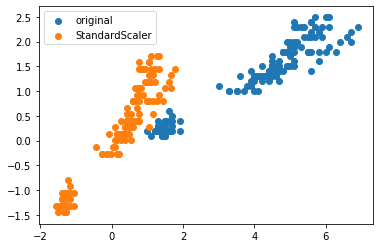

<Figure size 432x288 with 0 Axes>

In [38]:
#StandardScaler

from sklearn.preprocessing import StandardScaler

X = np.array([[70],
              [80],
              [120]])

scaler = StandardScaler()
print(scaler.fit_transform(X))

#On peut prendre n'importe quelle valeur dans le test set et la transformation sera appliquée (ex avec 90)
X_test = np.array([[90]])
scaler.transform(X_test)



#exemple avec les fleurs d'Iris

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X= iris.data
X_std = StandardScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3], label ='original')
plt.scatter(X_std[:,2],X_std[:,3], label ='StandardScaler')
plt.legend()
plt.show()
plt.clf()


[[-0.4]
 [ 0. ]
 [ 1.6]]


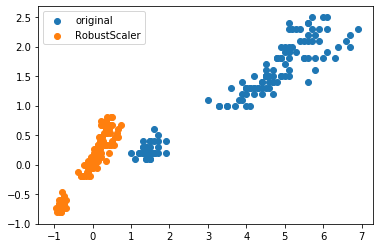

<Figure size 432x288 with 0 Axes>

In [39]:
#RobustScaler


from sklearn.preprocessing import RobustScaler

X = np.array([[70],
              [80],
              [120]])

scaler = RobustScaler()
print(scaler.fit_transform(X))

#On peut prendre n'importe quelle valeur dans le test set et la transformation sera appliquée (ex avec 90)
X_test = np.array([[90]])
scaler.transform(X_test)



#exemple avec les fleurs d'Iris

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X= iris.data
X_std = RobustScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3], label ='original')
plt.scatter(X_std[:,2],X_std[:,3], label ='RobustScaler')
plt.legend()
plt.show()
plt.clf()



### 1.3 Preprocessing - Discrétisation variables quantiatives continues

Créer des catégories comme des catégories d'ages dans une population

- Binarizer : découpe en deux tranches selon un seuil
- KBinsDiscretiser : découpe en n tranches

In [43]:
#Binarizer

from sklearn.preprocessing import Binarizer

X = np.linspace(0,5,10).reshape((10,1))
print(X)

#tout ce qui est inferieur à 3 = 0 et supérieur = 1)
np.hstack((X,Binarizer(threshold=3).fit_transform(X)))


[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]


array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [45]:
#KBinsDiscretiser

from sklearn.preprocessing import KBinsDiscretizer

X = np.linspace(0,5,10).reshape((10,1))
print(X)

#ici, découpage en 6 tranches
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

### 1.4- Faire suivre une distribution (polynomiale, gaussienne etc.)

- PolynomialFeature (pas d'exemple pour le moment)
- PowerTransformer (pas d'exemple pour le moment)




### 1.5- Normaliser selon une fonction personnalisée

- FunctionTransformer





In [49]:
#FunctionTransformer

from sklearn.preprocessing import FunctionTransformer
X = np.linspace(1,5,10).reshape((-1,1))
print(X)

Mon_transformer = FunctionTransformer(func= np.log1p, inverse_func = np.expm1)

Mon_transformer.fit_transform(X)

[[1.        ]
 [1.44444444]
 [1.88888889]
 [2.33333333]
 [2.77777778]
 [3.22222222]
 [3.66666667]
 [4.11111111]
 [4.55555556]
 [5.        ]]


array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])